In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the Dataset**

In [2]:
df=pd.read_csv('/content/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

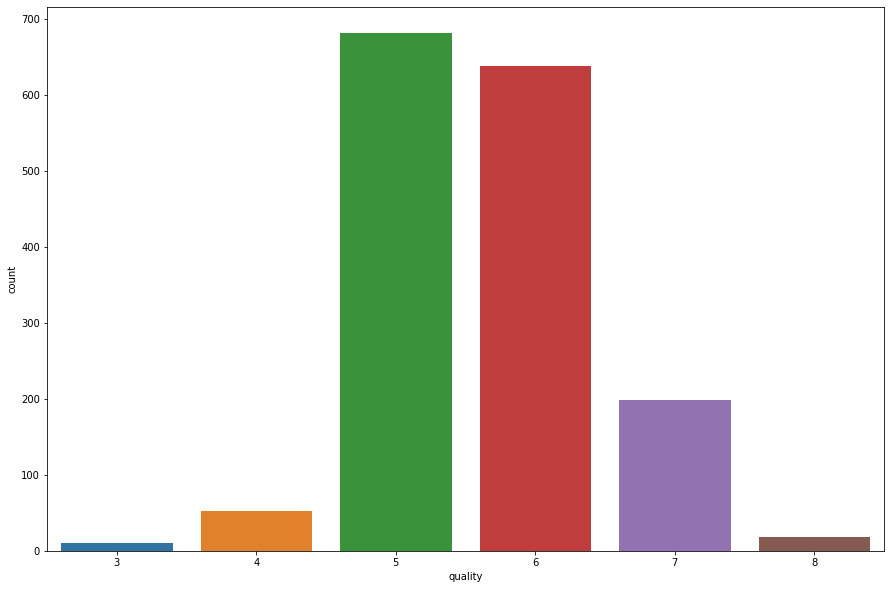

In [6]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='quality')

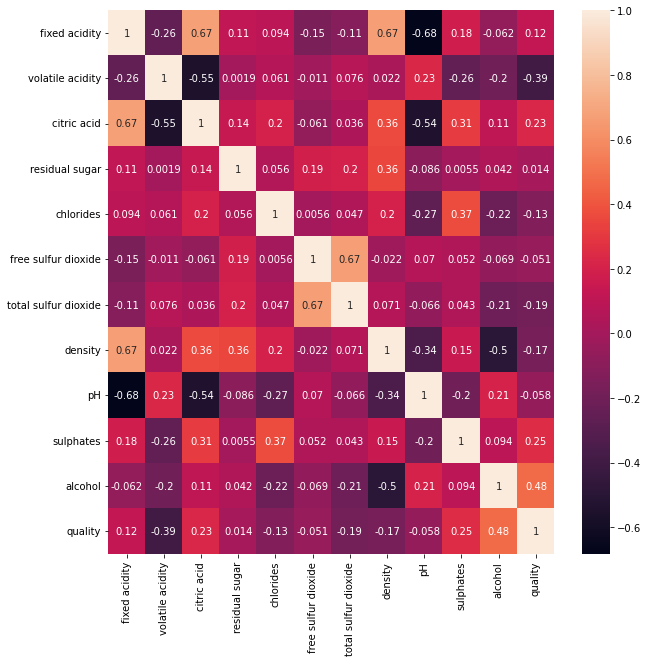

In [7]:
plt.figure(figsize=(10,10))
fig=df.corr()
sns.heatmap(fig,annot=True)

**Visualization and Pre Processing**

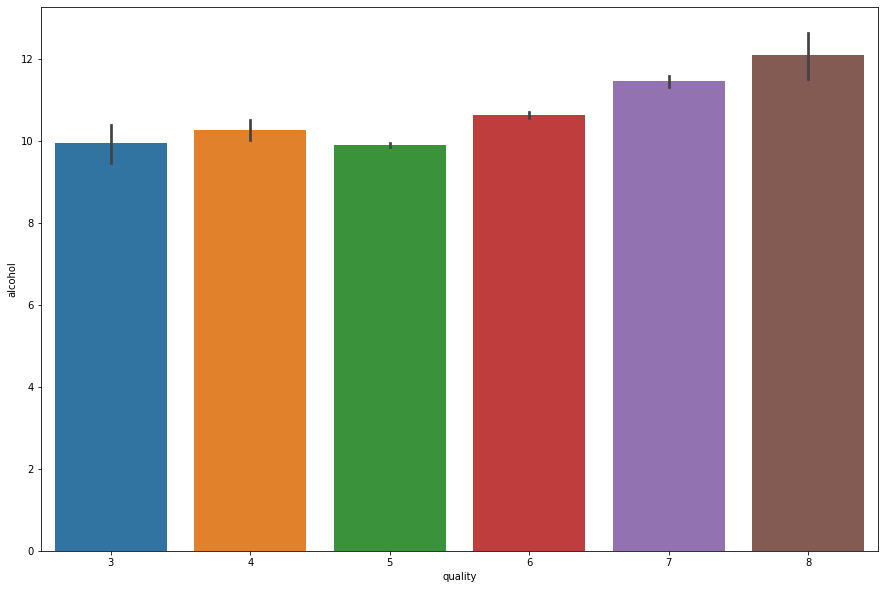

In [8]:
plt.figure(figsize=(15,10))
sns.barplot(x='quality',y='alcohol',data=df)

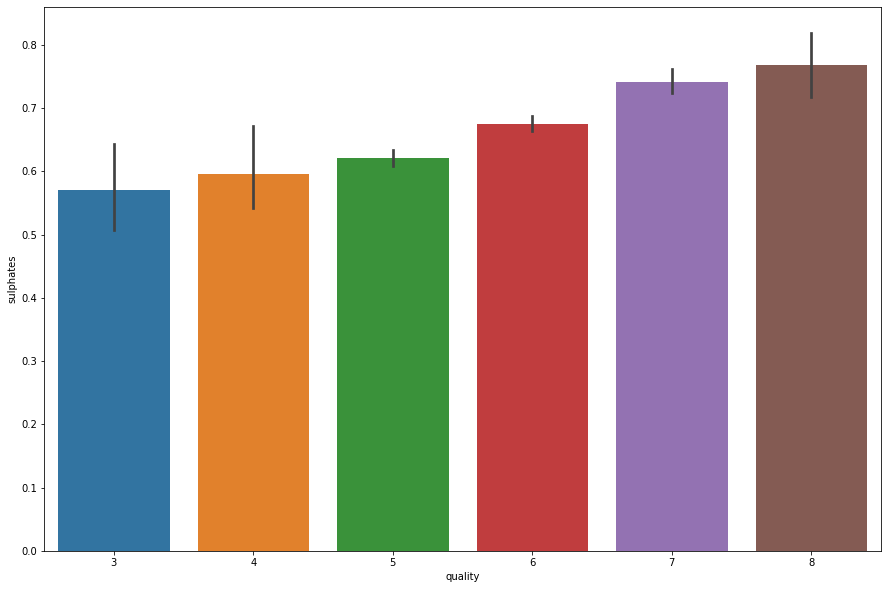

In [9]:
plt.figure(figsize=(15,10))
sns.barplot(x='quality',y='sulphates',data=df)

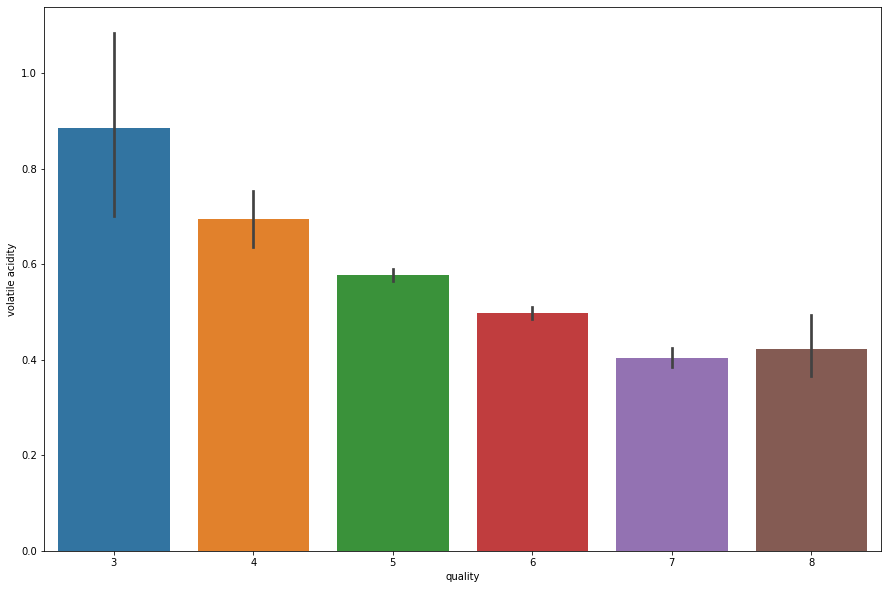

In [10]:
plt.figure(figsize=(15,10))
sns.barplot(x='quality',y='volatile acidity',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

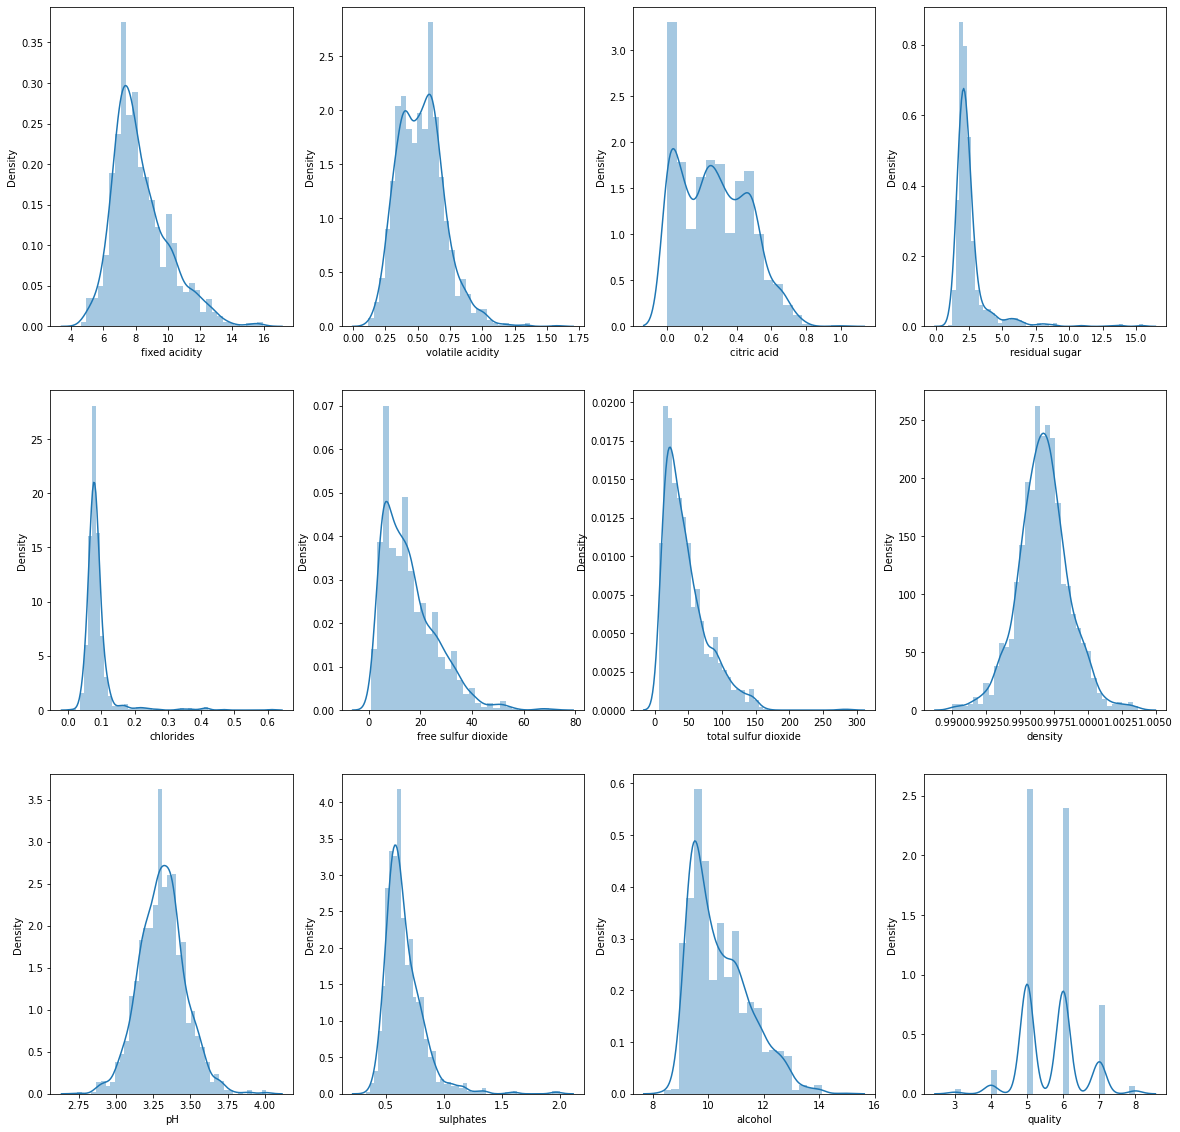

In [11]:
plt.figure(figsize=(20,20))
number=1

for columns in df:
    if number<=12:
        ax=plt.subplot(3,4,number)
        sns.distplot(df[columns])
        plt.xlabel(columns)
    number +=1
plt.show()

In [12]:
for i in df.columns:
  print(f"Skew Value of {i} : ",df[i].skew())

Skew Value of fixed acidity :  0.9827514413284587
Skew Value of volatile acidity :  0.6715925723840199
Skew Value of citric acid :  0.3183372952546368
Skew Value of residual sugar :  4.54065542590319
Skew Value of chlorides :  5.680346571971724
Skew Value of free sulfur dioxide :  1.250567293314441
Skew Value of total sulfur dioxide :  1.515531257594554
Skew Value of density :  0.07128766294927483
Skew Value of pH :  0.19368349811284427
Skew Value of sulphates :  2.4286723536602945
Skew Value of alcohol :  0.8608288068888538
Skew Value of quality :  0.21780157547366327


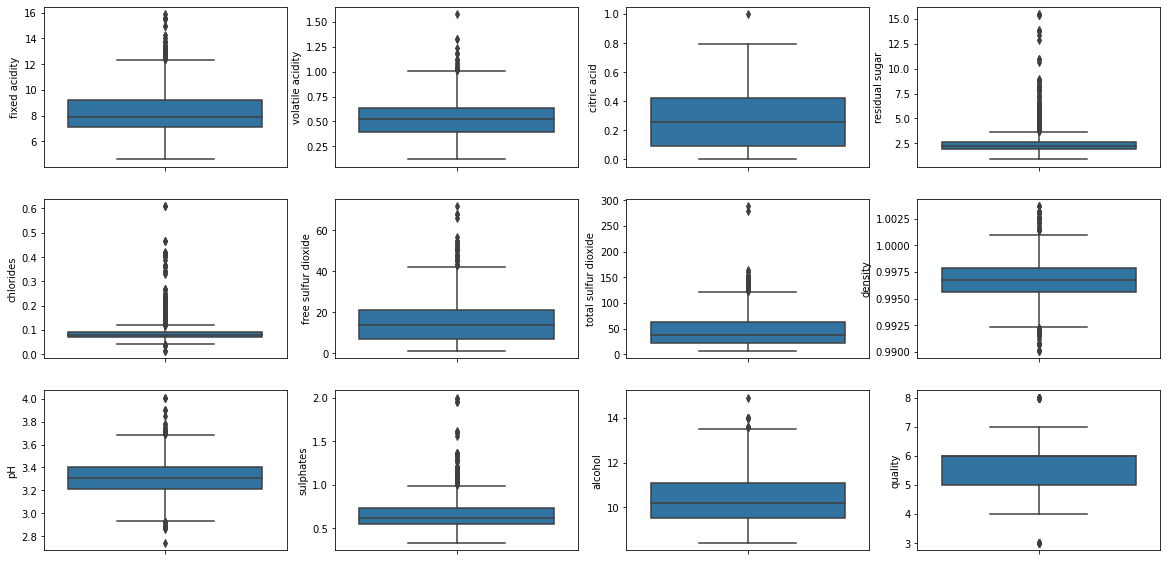

In [13]:
plt.figure(figsize=(20,10))
num=1

for column in df:
    if num<=12:
        ax=plt.subplot(3,4,num)
        sns.boxplot(y=df[column],data=df)
    num+=1
plt.show()

In [14]:
from scipy import stats
import numpy as np

z = stats.zscore(df)
z = np.abs(z)
new = (z < 3).all(axis=1)
df = df[new]
df=pd.DataFrame(df)

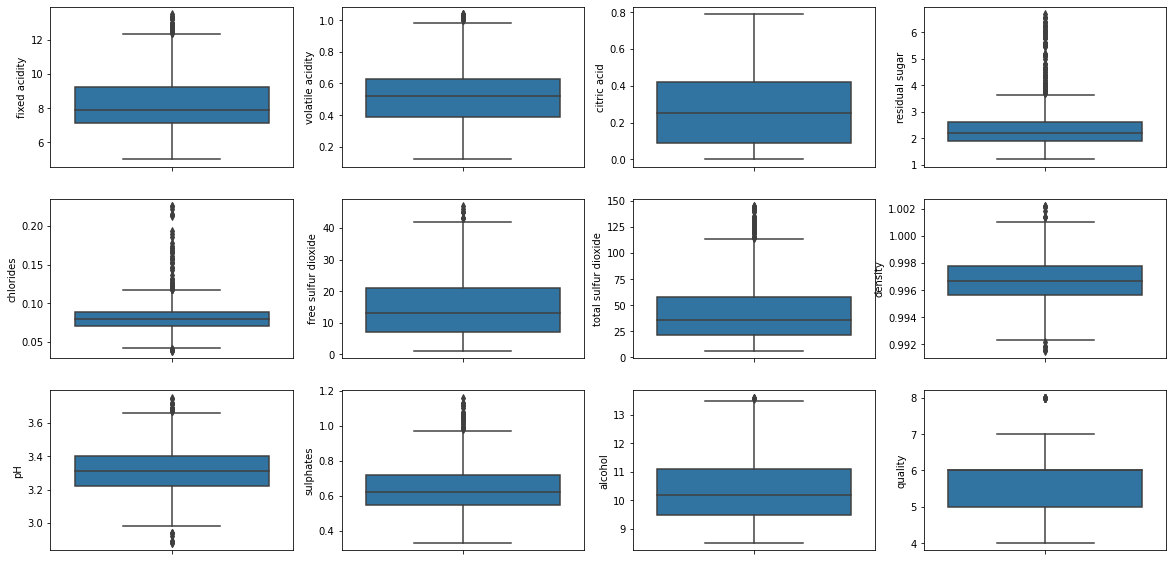

In [15]:
plt.figure(figsize=(20,10))
num=1

for column in df:
    if num<=12:
        ax=plt.subplot(3,4,num)
        sns.boxplot(y=df[column],data=df)
    num+=1
plt.show()

In [16]:
for i in df.columns:
  print(f"Skew of {i} : ",df[i].skew())

Skew of fixed acidity :  0.8239340241073351
Skew of volatile acidity :  0.3806591477316977
Skew of citric acid :  0.2912974107133157
Skew of residual sugar :  2.4561066979273734
Skew of chlorides :  2.2751624695992265
Skew of free sulfur dioxide :  0.8692496707339011
Skew of total sulfur dioxide :  1.1831606095517972
Skew of density :  0.055737813135713146
Skew of pH :  0.11470451042972468
Skew of sulphates :  0.8914917203295141
Skew of alcohol :  0.7589584200759185
Skew of quality :  0.4078653928070539


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


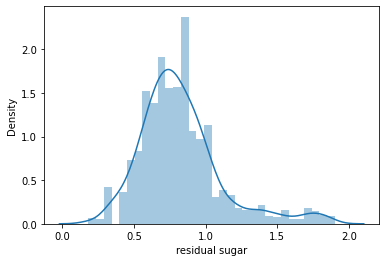

In [17]:
df['residual sugar']=np.log(df['residual sugar'])
sns.distplot(df['residual sugar'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


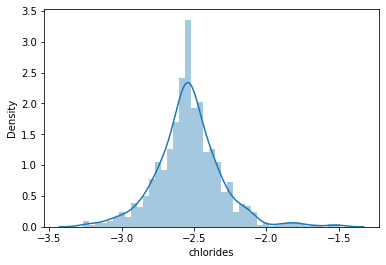

In [18]:
df['chlorides']=np.log(df['chlorides'])
sns.distplot(df['chlorides'])

In [19]:
df['total sulfur dioxide']=np.log(df['total sulfur dioxide'])


In [20]:
for i in df.columns:
  print(f"Skew of {i} : ",df[i].skew())

Skew of fixed acidity :  0.8239340241073351
Skew of volatile acidity :  0.3806591477316977
Skew of citric acid :  0.2912974107133157
Skew of residual sugar :  1.2270961325728975
Skew of chlorides :  0.4962716687478987
Skew of free sulfur dioxide :  0.8692496707339011
Skew of total sulfur dioxide :  -0.09690842300695492
Skew of density :  0.055737813135713146
Skew of pH :  0.11470451042972468
Skew of sulphates :  0.8914917203295141
Skew of alcohol :  0.7589584200759185
Skew of quality :  0.4078653928070539


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

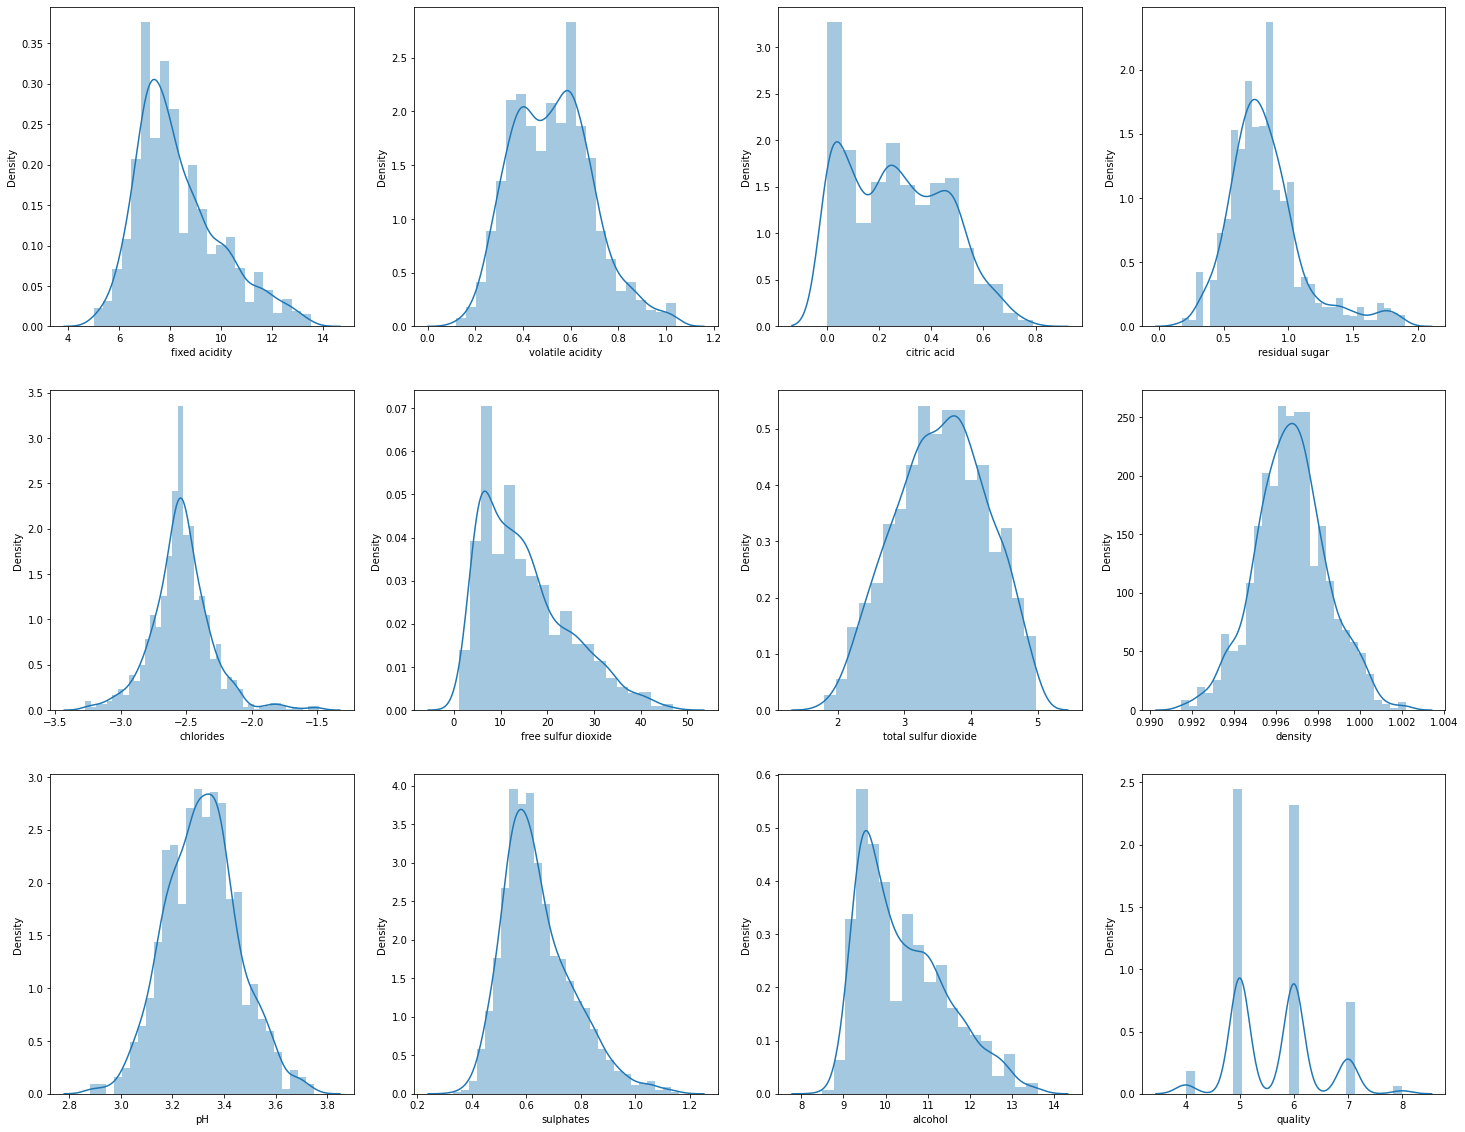

In [21]:
plt.figure(figsize=(25,20))
number=1

for columns in df:
    if number<=12:
        ax=plt.subplot(3,4,number)
        sns.distplot(df[columns])
        plt.xlabel(columns)
    number +=1
plt.show()

In [22]:
reviews=[]

for i in df['quality']:
  if i>=3 and i<=6:
    reviews.append('Bad')
  elif i>6 and i<=8:
    reviews.append('Good')
df['Reviews']=reviews

In [23]:
df['Reviews'].value_counts()

Bad     1250
Good     201
Name: Reviews, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Reviews'] = label_encoder.fit_transform(df['Reviews'])

In [25]:
df['Reviews'].value_counts()

0    1250
1     201
Name: Reviews, dtype: int64

In [26]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
y=df['Reviews']

**Model Building**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 75)), 'min_samples_split': [2, 3, 4,5,6]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)
y_pred = grid_search_cv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("The Accuracy of Decision Tree is: ",score*100)

Fitting 5 folds for each of 730 candidates, totalling 3650 fits
The Accuracy of Decision Tree is:  86.46788990825688


In [30]:
grid_search_cv.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 63, 'min_samples_split': 3}

In [31]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [4,8,12,16,20,25],
    'min_samples_split': [2, 3, 4,5,6],
    'min_samples_leaf': [2,3, ],
    'n_estimators': [10,20,30,40,50,75 ]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
y_pred1 = grid_search.predict(X_test)
score1 = accuracy_score(y_test, y_pred1)
print("The Accuracy of Random Forest is: ",score1*100)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
The Accuracy of Random Forest is:  90.59633027522935


In [32]:
grid_search.best_params_

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 20}

In [33]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
score2 = accuracy_score(y_test, y_pred2)
print("The Accuracy of XgBoost is: ",score2*100)

The Accuracy of XgBoost is:  89.44954128440367


In [34]:
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression()
logistic.fit(X_train, y_train)
y_pred3=logistic.predict(X_test)
score3 = accuracy_score(y_test, y_pred3)

from sklearn.metrics import accuracy_score
print("The Accuracy of Logistic Regression is:", accuracy_score(y_test,y_pred3)*100)

The Accuracy of Logistic Regression is: 88.30275229357798


In [35]:
from sklearn.naive_bayes import GaussianNB  

classifier = GaussianNB()  
classifier.fit(X_train, y_train)  
y_pred4 = classifier.predict(X_test)  
score4 = accuracy_score(y_test, y_pred4)
print("The Accuracy of Naive Bayes is: ",score4*100)

The Accuracy of Naive Bayes is:  83.25688073394495


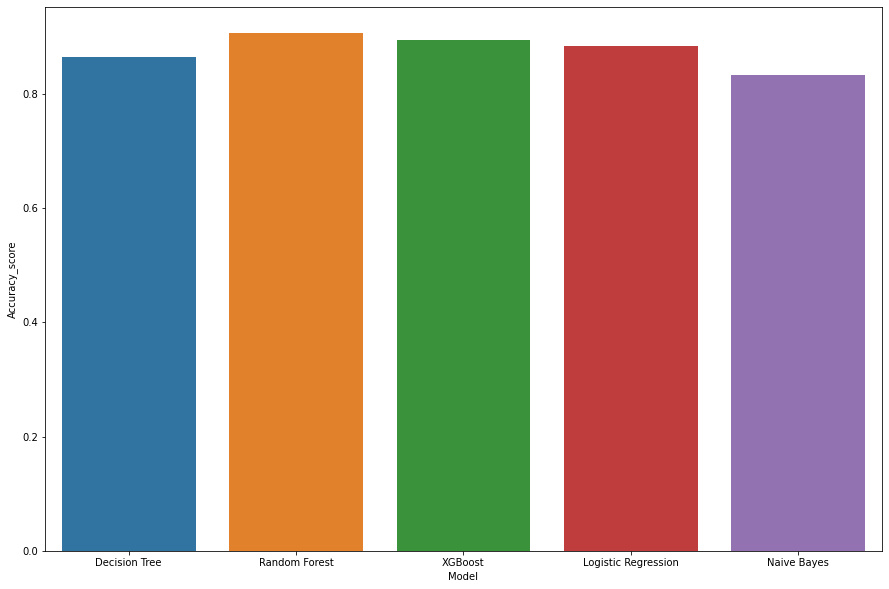

In [36]:
plt.figure(figsize=(15,10))
models = pd.DataFrame({
    'Model':[ 'Decision Tree', 'Random Forest', 'XGBoost', 'Logistic Regression', 'Naive Bayes'],
    'Accuracy_score' :[score, score1, score2, score3, score4]
})
models
sns.barplot(x='Model', y='Accuracy_score', data=models)

In [37]:
models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
1,Random Forest,0.905963
2,XGBoost,0.894495
3,Logistic Regression,0.883028
0,Decision Tree,0.864679
4,Naive Bayes,0.832569


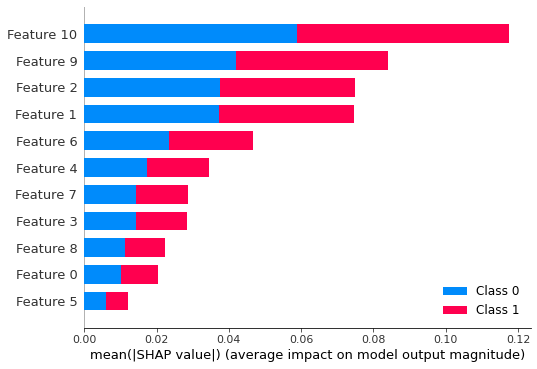

In [40]:
import shap
shap_values = shap.TreeExplainer(grid_search.best_estimator_).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

Hence, according to the shap values we find that features such as sulphates,alcohol,volatile acidity, chlorides and total sulfur dioxide play an important role in our model and are more promoient than the other features.

We can also conclude that Random Forest is the best performing algorithm showing an accuracy of about 90 % followed by XGBoost which is 89.5 % and Logistic Regression which shows 88 % accuracy.

Hence we will select Random Forest algorithm for our model as it is the best performing algorithm out of all.